In [2]:
import requests
import json
from numerize import numerize
from matplotlib import pyplot as plt
import seaborn as sns
#import numpy as np
sns.set_theme()
import csv

import matplotlib
matplotlib.rcParams['font.family'] = 'serif'
from datetime import date
date_today = date.today()
EXPORT_PATH = r'C:\Users\Johan\Nextcloud\Kurse im Studium\_Masterarbeit\Thesis\Latex\Assets\Diagramme & Graphen\pycharm_exports'
# plt.savefig(EXPORT_PATH+"\MRR_dev_epochs.pdf", format="pdf", bbox_inches="tight")

font = {'family': 'serif', 'color':  'black','weight': 200, 'size': 14 }

In [3]:
polite = 'mailto=udevz@student.kit.edu'

In [4]:
# define request function for convenience.
# Concatenates request and polite header, sends request and returns response in JSON

def request(api_call):
    req_string = str(api_call+'&'+polite)
    req = requests.get(req_string)
    if req.status_code == 200:
        return req.json()
    else:
        print('Request not successful ', req.status_code)
        return

In [5]:
def random_institution():
    return request('https://api.openalex.org/institutions/random?')

In [ ]:
random_institution()

In [7]:
# check institutions total count
req_json = request('https://api.openalex.org/institutions?')
total_count = req_json['meta']['count']
print('Institutions count total: ',numerize.numerize(total_count)) # ~108.67K am 21. Juni
print('Institutions count total: ',(total_count))

Institutions count total:  108.67K
Institutions count total:  108667


In [10]:
# institutions by type
req_json = request('https://api.openalex.org/institutions?group_by=type')
institution_type_count = {}
for item in req_json['group_by']:
    institution_type_count[item['key_display_name']] = item['count']
institution_type_count

{'company': 29498,
 'education': 19818,
 'nonprofit': 13796,
 'healthcare': 12972,
 'facility': 9302,
 'other': 8118,
 'unknown': 6306,
 'government': 6034,
 'archive': 2823}

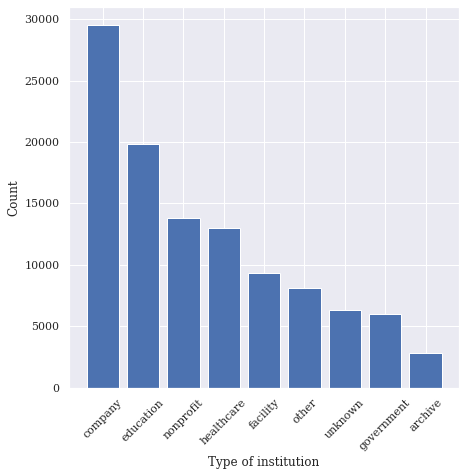

In [11]:
plt.bar(range(len(institution_type_count)), list(institution_type_count.values()), tick_label=list(institution_type_count.keys()))
#plt.title('Number maintained (unique) institutions according to type')
plt.xlabel('Type of institution')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.gcf().set_size_inches((7, 7))
plt.show()

In [12]:
type_counts = []
type_labels = []
i=0
for x in [t for t in institution_type_count.items()]:
    type_counts.append(x[1])
    type_labels.append(x[0])

    i+=1


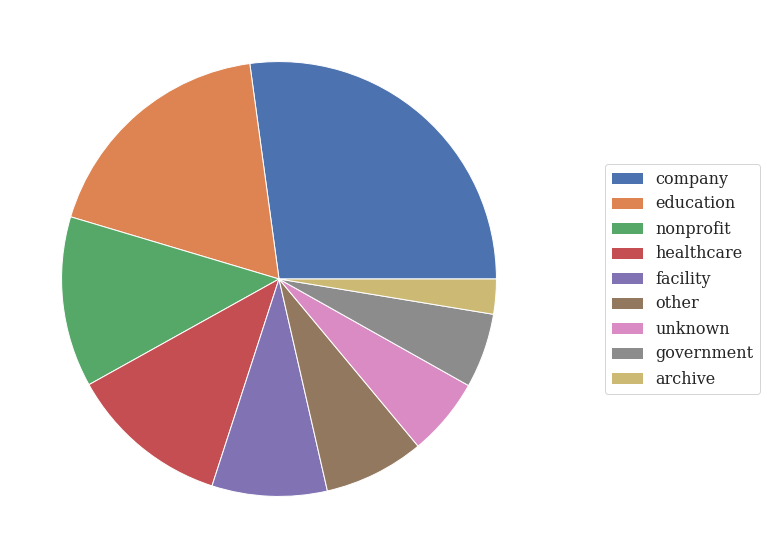

In [13]:
# create pie for institution types above
#plt.style.use('seaborn')
patches, texts = plt.pie(type_counts, startangle=0) #labels= top_type_labels,
#plt.title('Composition of works according to type label')

plt.gcf().set_size_inches((10,10))
plt.legend(patches, type_labels, loc="right", bbox_to_anchor=(1.4,0.5),prop={'size': 16},facecolor='white') #10,10;1.3,0.5
plt.savefig(EXPORT_PATH+f"\Pie Institution Types {date_today}.pdf", format="pdf", bbox_inches="tight")

plt.show()


In [7]:
req_json = request('https://api.openalex.org/institutions?group_by=country_code')
institution_country_count = {}
for item in req_json['group_by']:
    institution_country_count[item['key_display_name']] = item['count']
institution_country_count

{'United States of America': 32814,
 'United Kingdom of Great Britain and Northern Ireland': 7743,
 'Germany': 5096,
 'China': 4856,
 'Japan': 4031,
 'France': 3965,
 'India': 3731,
 'Canada': 3498,
 'Czechia': 2751,
 'Russian Federation': 2138,
 'Italy': 2068,
 'Norway': 1942,
 'Brazil': 1805,
 'Spain': 1804,
 'Korea, Republic of': 1666,
 'Netherlands': 1666,
 'Switzerland': 1601,
 'Australia': 1517,
 'Sweden': 1516,
 'Poland': 1210,
 'unknown': 975,
 'Belgium': 952,
 'Austria': 718,
 'Ireland': 667,
 'Denmark': 635,
 'Mexico': 625,
 'Indonesia': 610,
 'Portugal': 557,
 'Finland': 508,
 'Taiwan, Province of China': 506,
 'Greece': 503,
 'South Africa': 501,
 'Turkey': 455,
 'Slovakia': 453,
 'Ukraine': 450,
 'Iran, Islamic Republic of': 414,
 'Israel': 410,
 'Hungary': 408,
 'Slovenia': 376,
 'Argentina': 348,
 'Pakistan': 344,
 'Colombia': 340,
 'Philippines': 320,
 'New Zealand': 296,
 'Thailand': 294,
 'Nigeria': 290,
 'Romania': 277,
 'Singapore': 260,
 'Kenya': 254,
 'Viet Nam': 

In [8]:
req_json = request('https://api.openalex.org/institutions?filter=has_ror:true')
print('Institution ROR count total:',numerize.numerize(req_json['meta']['count'])) # ~102.39 mio. on 23. June
print('That is',numerize.numerize(100*req_json['meta']['count']/request('https://api.openalex.org/institutions?')['meta']['count']), '% of all institutions')

Institution ROR count total: 102.39K
That is 94.23 % of all institutions


In [10]:
for i in request("https://api.openalex.org/institutions?filter=country_code:de")['results']:
    print(i['display_name'],"Works:",i['works_count'],"Cited:",i['cited_by_count'])
    print(numerize.numerize(100*i['cited_by_count']/i['works_count']))

Ludwig-Maximilians-Universität München Works: 143071 Cited: 12222021
8.54K
Technical University of Munich Works: 121557 Cited: 7881511
6.48K
Heidelberg University Works: 110086 Cited: 11579684
10.52K
University of Erlangen-Nuremberg Works: 100903 Cited: 6809575
6.75K
University of Tübingen Works: 99326 Cited: 7077895
7.13K
RWTH Aachen University Works: 97995 Cited: 9165808
9.35K
University of Bonn Works: 94621 Cited: 8875191
9.38K
University of Göttingen Works: 93043 Cited: 7464007
8.02K
Karlsruhe Institute of Technology Works: 85300 Cited: 6909845
8.1K
Max Planck Society Works: 84975 Cited: 18017450
21.2K
Goethe University Frankfurt Works: 83907 Cited: 6615299
7.88K
University of Münster Works: 79092 Cited: 5312705
6.72K
Freie Universität Berlin Works: 78997 Cited: 4119115
5.21K
University of Freiburg Works: 78073 Cited: 7679250
9.84K
Johannes Gutenberg University of Mainz Works: 74225 Cited: 7080832
9.54K
Universität Hamburg Works: 72602 Cited: 6327030
8.71K
Humboldt-Universität zu B

In [ ]:
types = []
for i in request("https://api.openalex.org/institutions?sort=cited_by_count:desc&per-page=100")['results']:
    print(i['display_name'],"| Type:",i['type'],"| Works:",i['works_count'],"| Cited:",i['cited_by_count'],numerize.numerize(i['cited_by_count']/i['works_count']))
    types.append(i['type'])



In [ ]:
len(types)

In [27]:
# how many of the top 100 cited institutions are of educational type?`
types.count('education')

86